# LOGISTIC REGRESSION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\SHREYA SHANKAR\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('diabetes1.csv')

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Basic Checks

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
data.describe()

#in min value see it is wrong
#so we say that data is not correct

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.info()
# no missing values
# 0 value not possible in min- hence we say that data is corrupted
#0 value not possible for glucose,BP,skin thickness and insulin.This is called as data corruption

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Exploratory Data Analysis

In [9]:
#UNIVARIATE ANALYSIS

data.head(22)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<Axes: xlabel='Pregnancies', ylabel='count'>

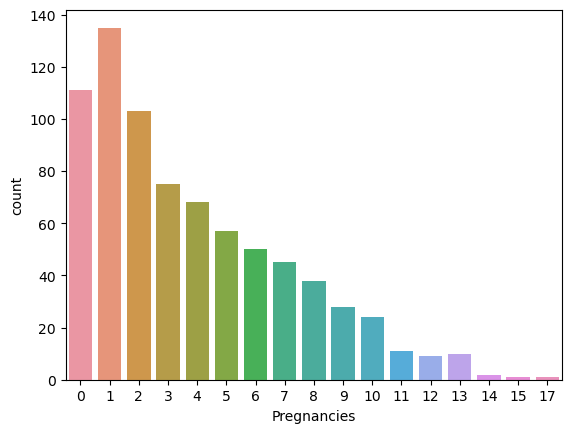

In [10]:
sns.countplot( x = "Pregnancies", data = data)

In [11]:
data.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

<Axes: xlabel='Glucose', ylabel='Count'>

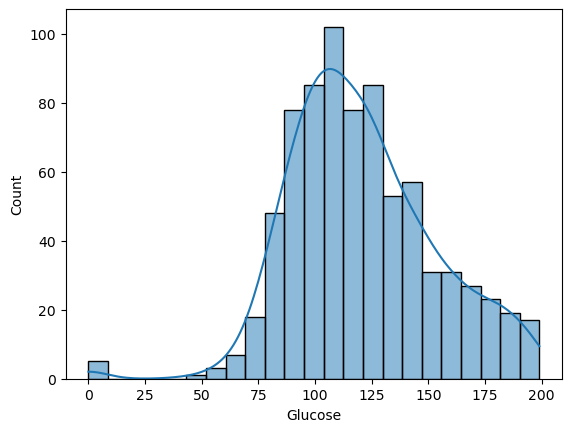

In [12]:
sns.histplot(data['Glucose'] , kde = True)

In [13]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


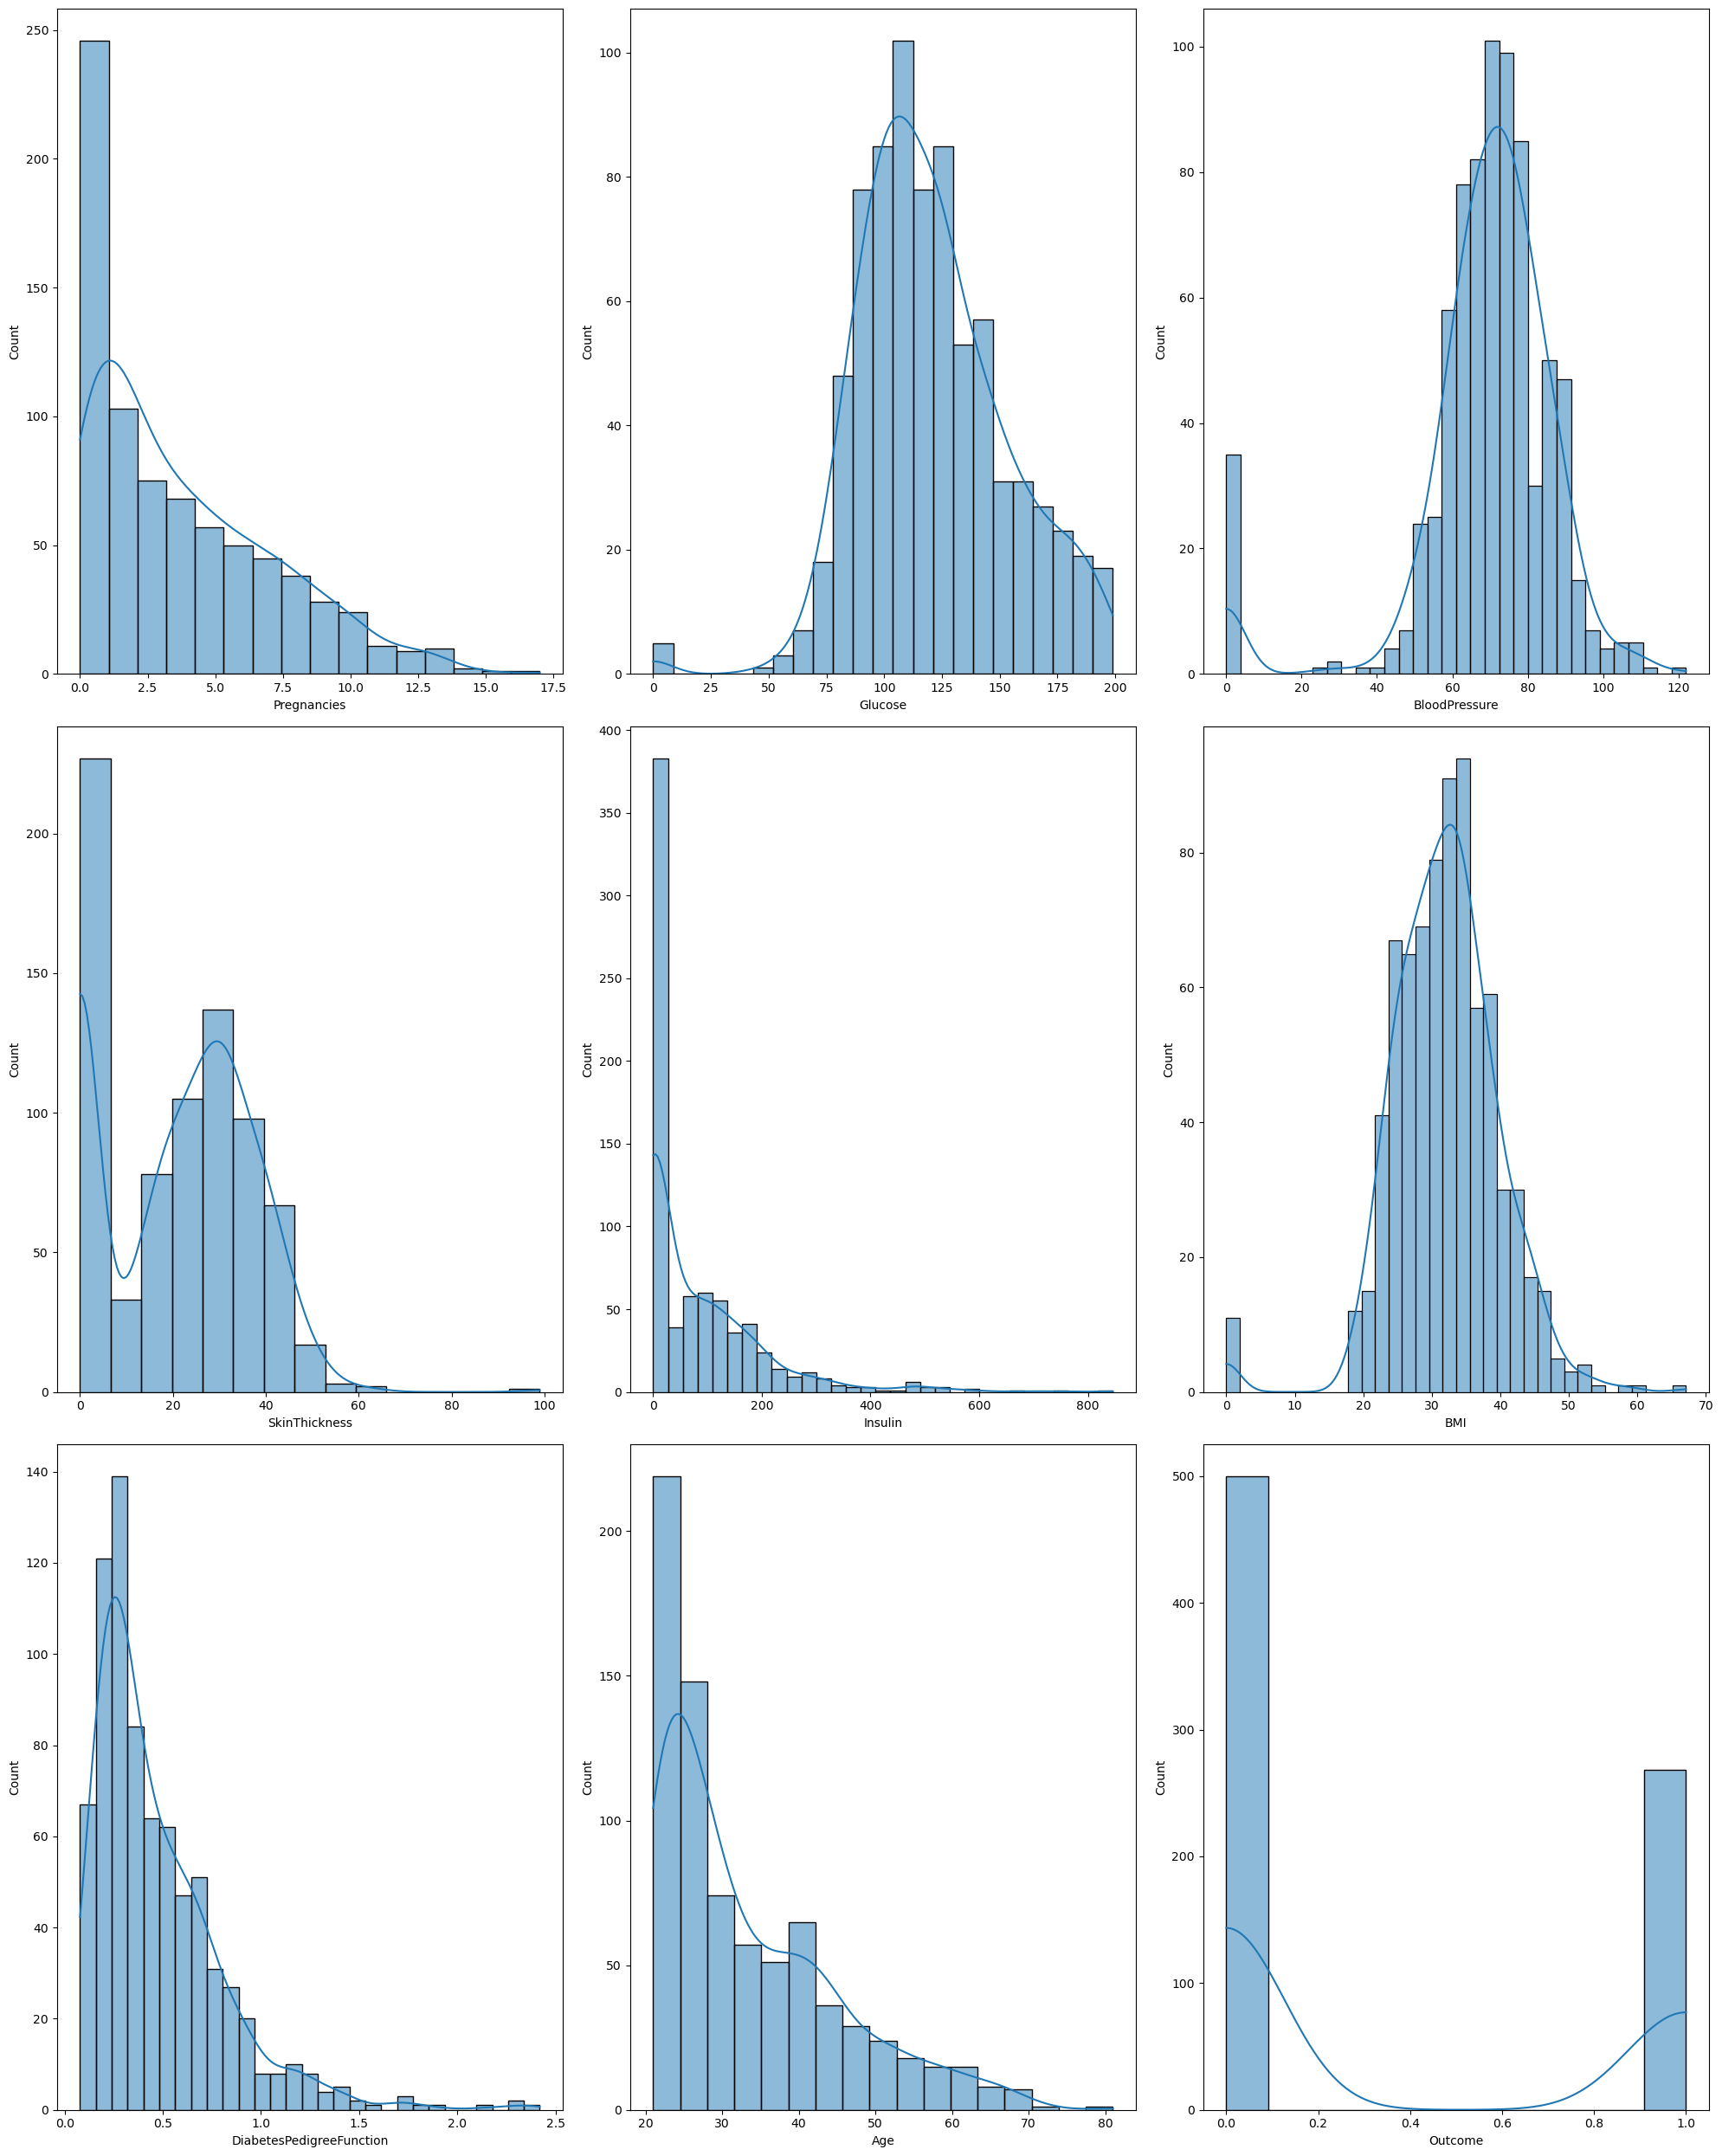

In [14]:
plt.figure(figsize = (20,25), facecolor = 'white')  #background color
plotnumber = 1

for column in data:
    plt.subplot(3,3,plotnumber)   #3x3 matrix
    sns.histplot(data[column], kde = True)      #wrt to each column
    
    plotnumber+=1                #increment 
plt.tight_layout()


<Axes: xlabel='Pregnancies', ylabel='count'>

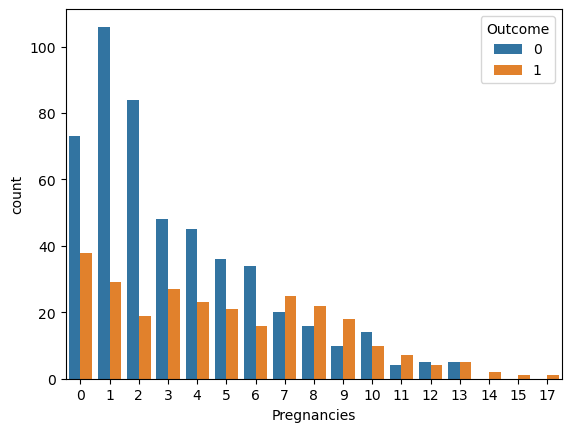

In [15]:
##Bivariate Analysis refers to plots between input variables and target variable.

## Analyzing how preganancies impact the patient with diabetes.

sns.countplot(x='Pregnancies',hue='Outcome',data=data)


1)If the pateint is preganent,she will get diabetes.But after analyzing this data,we found as the no of pregnenacy increases chances of getting diabetes also increases.
2)At from 14 to 17 pregnancies all women are diabetic.

In [16]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Glucose', ylabel='Age'>

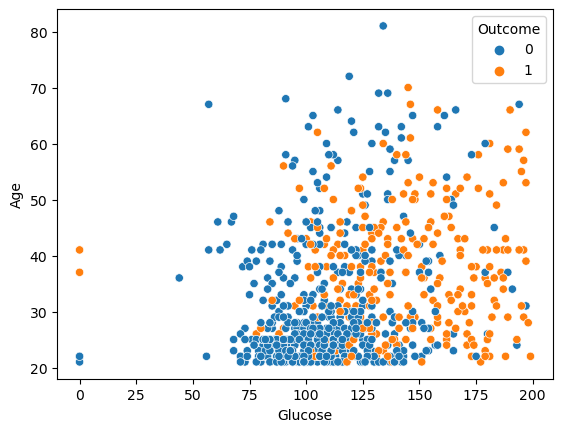

In [17]:
sns.scatterplot(x='Glucose',y='Age',data=data,hue='Outcome')

<Axes: xlabel='BloodPressure', ylabel='Count'>

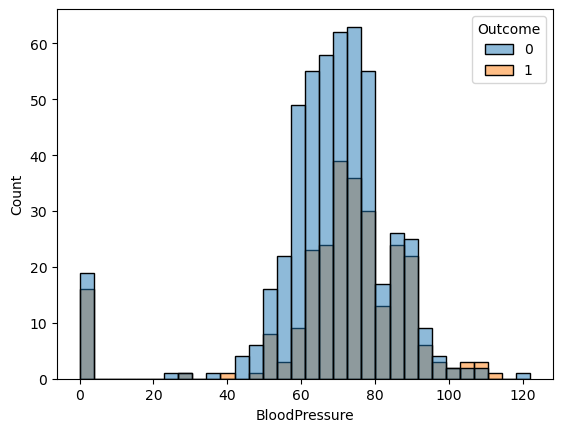

In [18]:
## Aanlyzing the relationship between diabetes and Glucose
#sns.histplot(x='Glucose',hue='Outcome',data=data)
sns.histplot(x='BloodPressure',hue='Outcome',data=data)


1)In the given data,a person having glucose range till 100 can be considered as they have lesser chance of getting diabetes.

2)A person having glucose range between 100 to 150,he is equaly at risk and no risk and we need to analyze more features of the pateint.

3)If a person have glucose more than 150,higher is the chnace of getting diabetes.

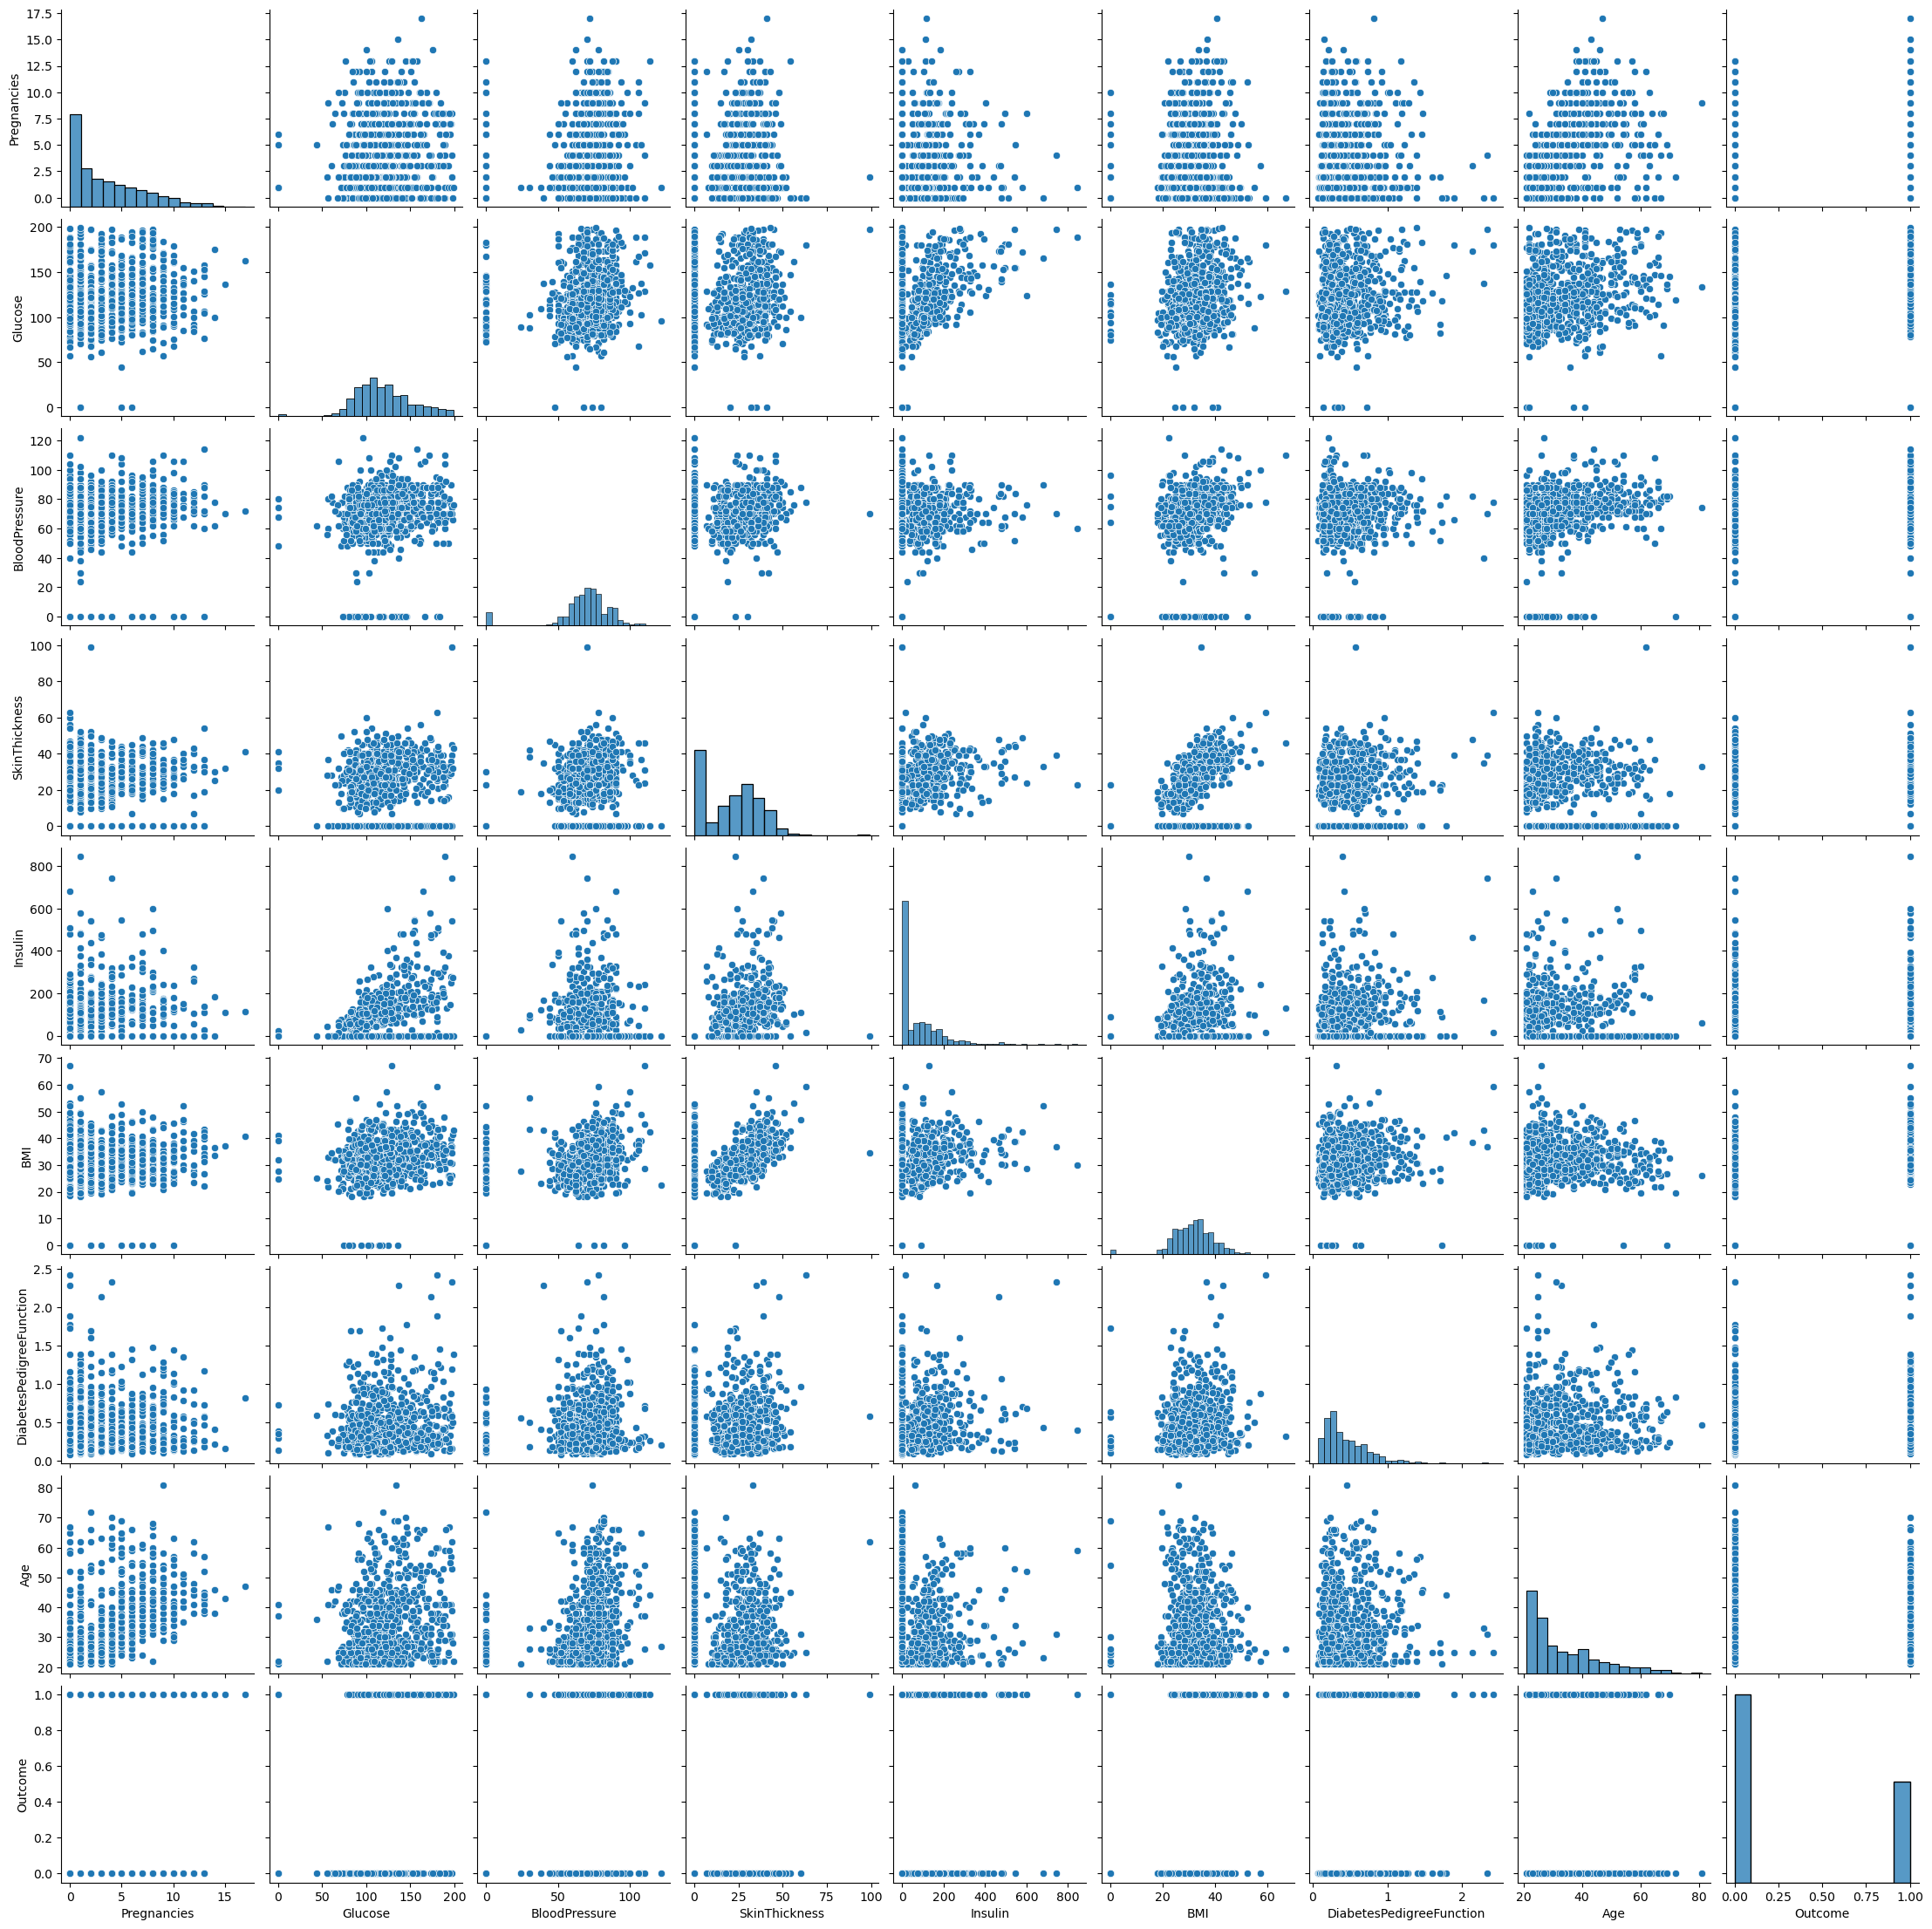

In [19]:
sns.pairplot(data)

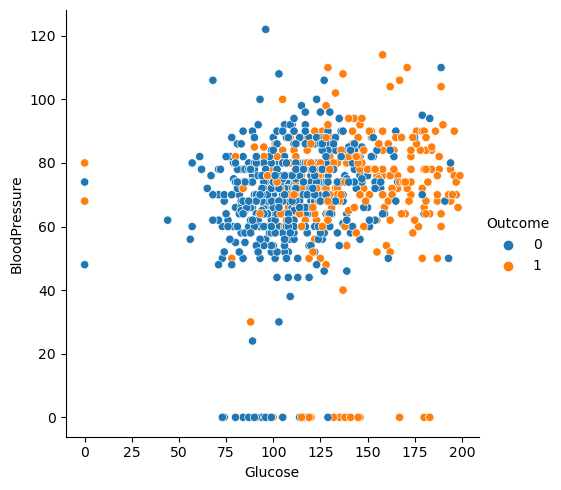

In [20]:
## Analyze Glucose with blood pressure

sns.relplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

By analyzing BP and Glucose together,we can say we need more features to understand if glucose increased to certain level,even if the BP is normal, the person is diabetic.

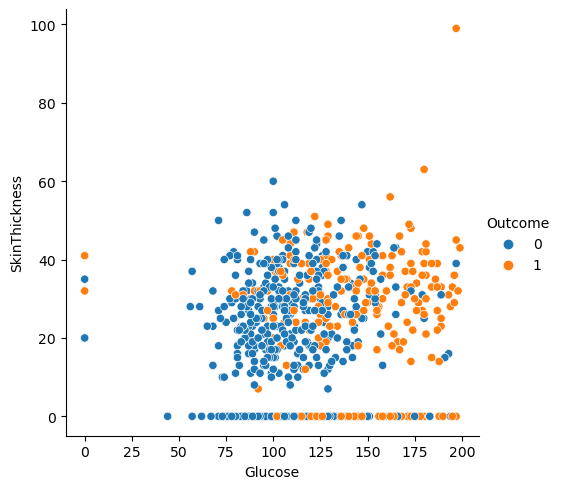

In [21]:
## Analyze Glucose with SkinThickness

sns.relplot(x='Glucose',y='SkinThickness',hue='Outcome',data=data)
plt.show()

<Axes: xlabel='BloodPressure', ylabel='Count'>

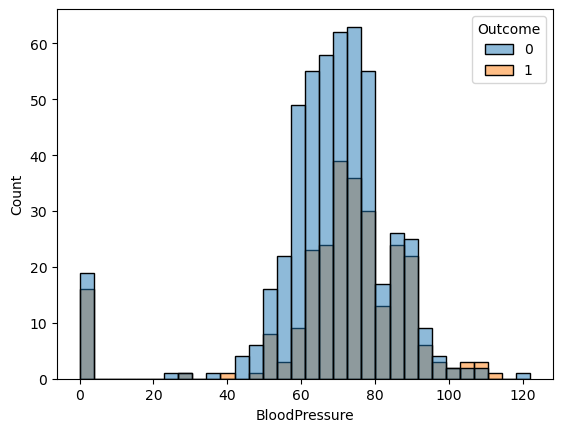

In [22]:
## Analyze relationship between BloodPressure and Outcome

sns.histplot(x='BloodPressure',hue='Outcome',data=data)

No specific relationship found.

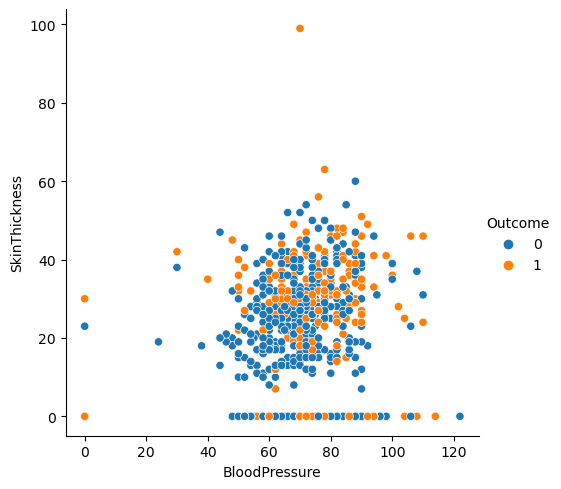

In [23]:
## Analyze BP with SkinThickness

sns.relplot(x='BloodPressure',y='SkinThickness',hue='Outcome',data=data)
plt.show()

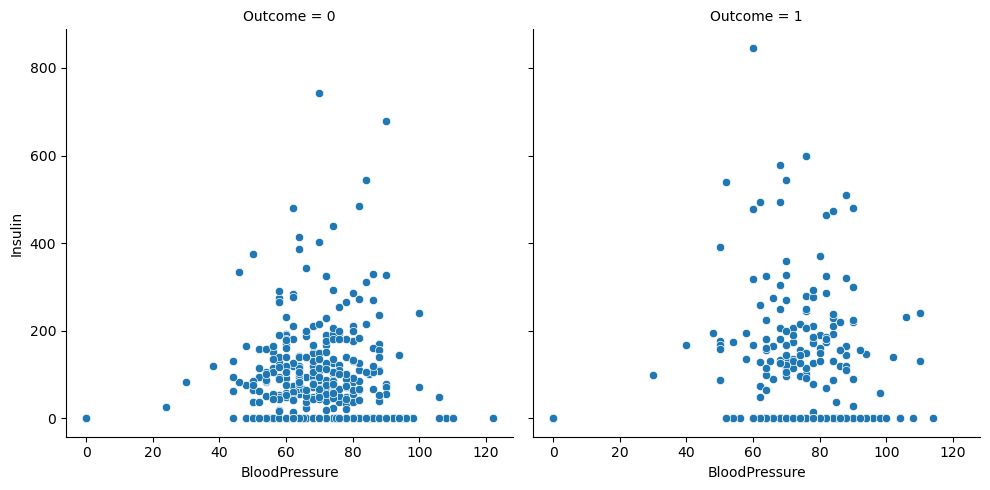

In [24]:
## Analyze BP with Insulin

sns.relplot(x='BloodPressure',y='Insulin',col='Outcome',data=data)

<Axes: xlabel='Insulin', ylabel='Count'>

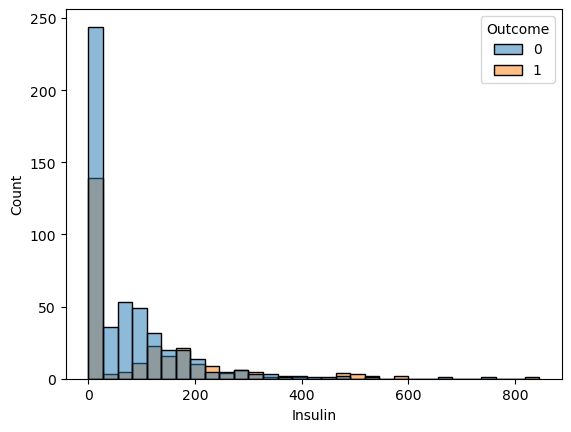

In [25]:
## Analyzing Insulin with target
sns.histplot(x='Insulin',hue='Outcome',data=data)

# Data Preprocessing

In [26]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
np.median(data['Glucose'])

117.0

In [28]:
#Step 1 Handling the missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
## Step 2 Handling the corrupted data.
## In 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI' certain datapoints are zero.

#dataframe.colum.replace('Value to be replaced','By what value')
data.loc[data['Glucose']==0,'Glucose']=np.median(data['Glucose'])

In [30]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.438286,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
# .replace(old, new )
#data.Glucose.replace(0,np.median(data.Glucose),inplace=True)

In [32]:
data.loc[data['BMI']==0,"BMI"]=np.median(data['BMI'])

In [33]:
data.BloodPressure.replace(0,np.median(data.BloodPressure),inplace=True)
data.SkinThickness.replace(0,np.median(data.SkinThickness),inplace=True)
data.Insulin.replace(0,np.median(data.Insulin),inplace=True)

In [34]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [35]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [36]:
## Step 3:- Numerical representation of string data
# Skip as not categorical data

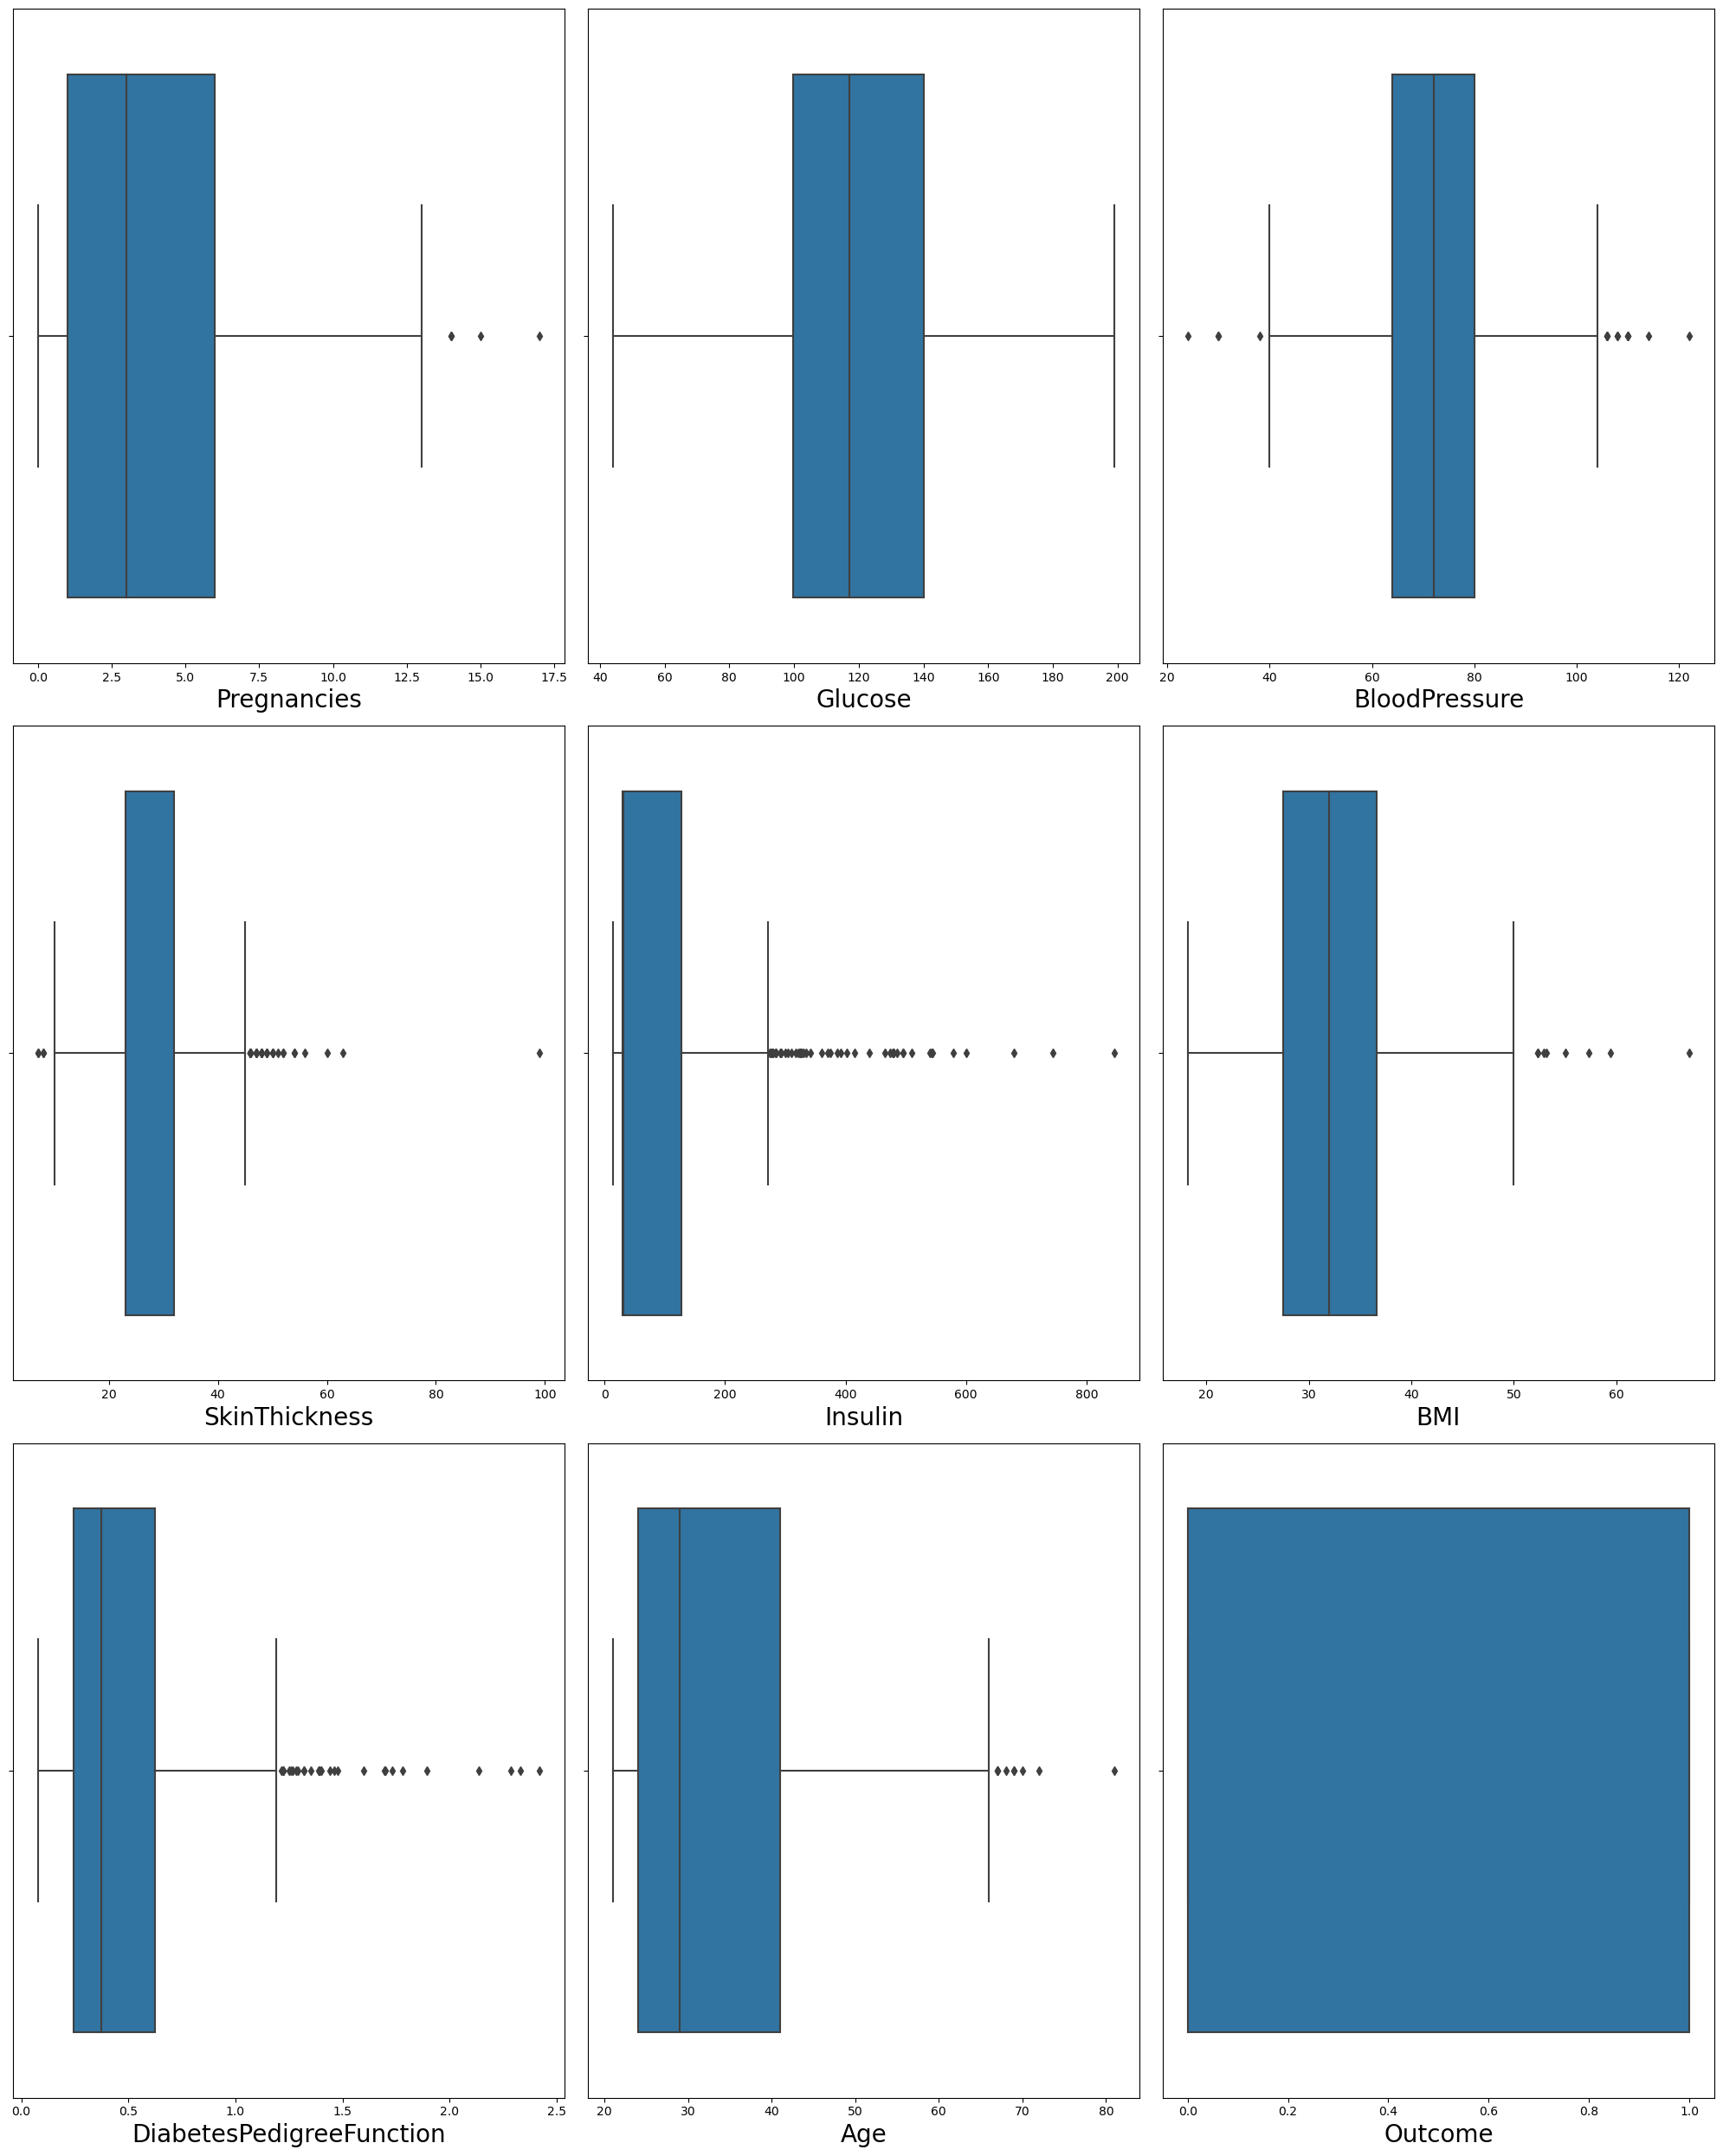

In [37]:
## Step 4:-Checking the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
   
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x=data[column])
    
    plt.xlabel(column,fontsize=20)
    #plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='Pregnancies'>

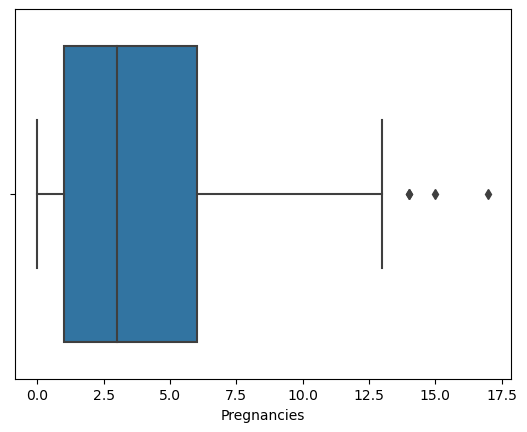

In [38]:
sns.boxplot(x=data['Pregnancies'])

In [39]:
data.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [40]:
np.median(data.Pregnancies)

3.0

In [41]:
#handling outliers
data.loc[data['Pregnancies']>13,'Pregnancies']=1

<Axes: xlabel='Pregnancies'>

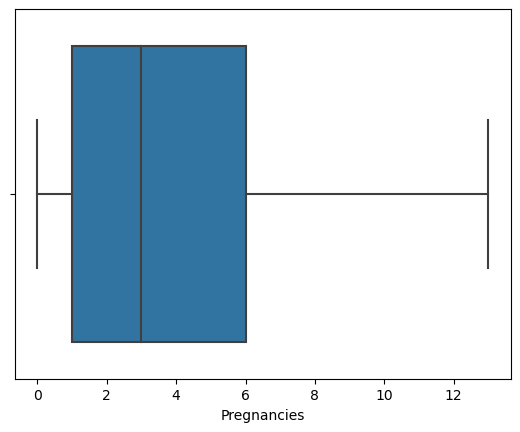

In [42]:
sns.boxplot(x=data['Pregnancies'])

In [43]:
data.BloodPressure.unique()

array([ 72,  66,  64,  40,  74,  50,  70,  96,  92,  80,  60,  84,  30,
        88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,  85,
        86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,  46,
       102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [44]:
data.BloodPressure.value_counts()

BloodPressure
72     79
70     57
74     52
78     45
68     45
64     43
80     40
76     39
60     37
62     34
66     30
82     30
88     25
84     23
90     22
58     21
86     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
94      6
85      6
48      5
96      4
44      4
98      3
100     3
106     3
110     3
55      2
30      2
104     2
46      2
108     2
61      1
38      1
24      1
122     1
102     1
95      1
40      1
114     1
Name: count, dtype: int64

In [45]:
np.median(data['BloodPressure'])

72.0

In [46]:
data.loc[data['BloodPressure']<40,'BloodPressure']=np.median(data['BloodPressure'])
data.loc[data['BloodPressure']>110,'BloodPressure']=np.median(data['BloodPressure'])

In [47]:
data.SkinThickness.unique()

array([35, 29, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31, 37,
       42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40, 51,
       56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

<Axes: xlabel='SkinThickness'>

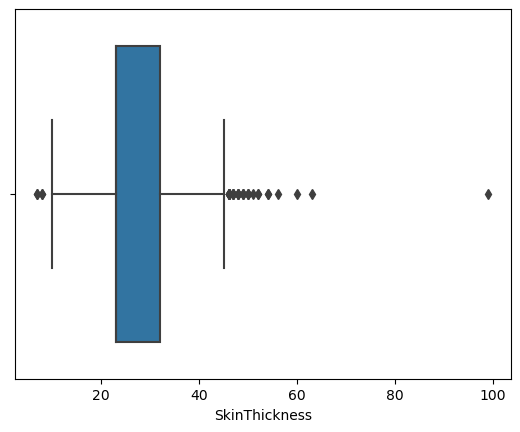

In [48]:
sns.boxplot(x=data['SkinThickness'])

In [49]:
#skin thickness
data.loc[data['SkinThickness']>58,'SkinThickness']=np.median(data['SkinThickness'])
data.loc[data['SkinThickness']<10,'SkinThickness']=np.median(data['SkinThickness'])

<Axes: xlabel='SkinThickness'>

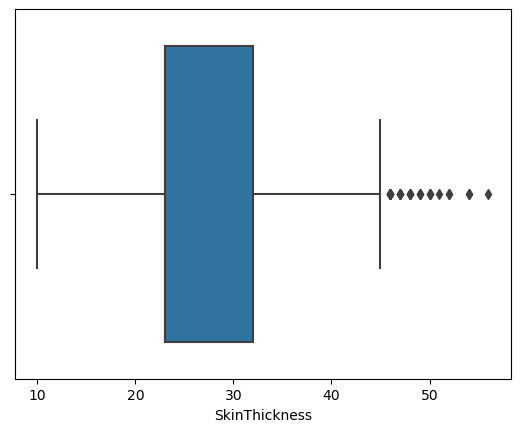

In [50]:
sns.boxplot(x=data['SkinThickness'])

<Axes: xlabel='Insulin'>

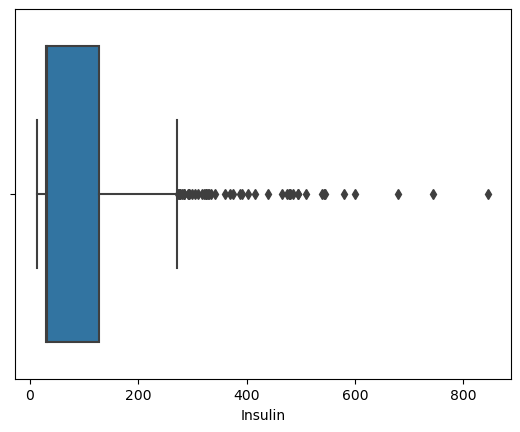

In [51]:
sns.boxplot(x=data['Insulin'])

In [52]:
#Insulin
data.loc[data['Insulin']>550,'Insulin']=np.median(data['Insulin'])

In [53]:
data.loc[data['BMI']>50,'BMI']=np.median(data['BMI'])
data.loc[data['DiabetesPedigreeFunction']>1.7,'DiabetesPedigreeFunction']=np.median(data['DiabetesPedigreeFunction'])
#age
data.loc[data['Age']>70,'Age']=np.median(data['Age'])

In [54]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.6270,50,1
1,1,85,66,29,30.5,26.6,0.3510,31,0
2,8,183,64,23,30.5,23.3,0.6720,32,1
3,1,89,66,23,94.0,28.1,0.1670,21,0
4,0,137,40,35,168.0,43.1,0.3725,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.1710,63,0
764,2,122,70,27,30.5,36.8,0.3400,27,0
765,5,121,72,23,112.0,26.2,0.2450,30,0
766,1,126,60,23,30.5,30.1,0.3490,47,1


In [55]:
## Step 5:-Scaling the data

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dl=['Pregnancies','Outcome']
data1=sc.fit_transform(data.drop(dl,axis=1))


In [56]:
data1

array([[0.67096774, 0.45714286, 0.54347826, ..., 0.48427673, 0.33867983,
        0.59183673],
       [0.26451613, 0.37142857, 0.41304348, ..., 0.26415094, 0.16841456,
        0.20408163],
       [0.89677419, 0.34285714, 0.2826087 , ..., 0.16037736, 0.36644047,
        0.2244898 ],
       ...,
       [0.49677419, 0.45714286, 0.2826087 , ..., 0.25157233, 0.10302283,
        0.18367347],
       [0.52903226, 0.28571429, 0.2826087 , ..., 0.37421384, 0.16718075,
        0.53061224],
       [0.31612903, 0.42857143, 0.45652174, ..., 0.3836478 , 0.14620605,
        0.04081633]])

In [57]:
con_data=data[['Pregnancies','Outcome']]
con_data

,Pregnancies,Outcome
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [58]:
data2=pd.DataFrame(data1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
data2

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.670968,0.457143,0.543478,0.031073,0.484277,0.338680,0.591837
1,0.264516,0.371429,0.413043,0.031073,0.264151,0.168415,0.204082
2,0.896774,0.342857,0.282609,0.031073,0.160377,0.366440,0.224490
3,0.290323,0.371429,0.282609,0.150659,0.311321,0.054904,0.000000
4,0.600000,0.000000,0.543478,0.290019,0.783019,0.181678,0.244898
...,...,...,...,...,...,...,...
763,0.367742,0.514286,0.826087,0.312618,0.462264,0.057372,0.857143
764,0.503226,0.428571,0.369565,0.031073,0.584906,0.161629,0.122449
765,0.496774,0.457143,0.282609,0.184557,0.251572,0.103023,0.183673
766,0.529032,0.285714,0.282609,0.031073,0.374214,0.167181,0.530612


In [59]:
final_df=pd.concat([data2,con_data],axis=1)
final_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.457143,0.543478,0.031073,0.484277,0.338680,0.591837,6,1
1,0.264516,0.371429,0.413043,0.031073,0.264151,0.168415,0.204082,1,0
2,0.896774,0.342857,0.282609,0.031073,0.160377,0.366440,0.224490,8,1
3,0.290323,0.371429,0.282609,0.150659,0.311321,0.054904,0.000000,1,0
4,0.600000,0.000000,0.543478,0.290019,0.783019,0.181678,0.244898,0,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.514286,0.826087,0.312618,0.462264,0.057372,0.857143,10,0
764,0.503226,0.428571,0.369565,0.031073,0.584906,0.161629,0.122449,2,0
765,0.496774,0.457143,0.282609,0.184557,0.251572,0.103023,0.183673,5,0
766,0.529032,0.285714,0.282609,0.031073,0.374214,0.167181,0.530612,1,1


# Feature Selection

In [60]:
data2.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Glucose,1.000000,0.214312,0.143908,0.327138,0.228245,0.081729,0.269811
BloodPressure,0.214312,1.000000,0.167725,-0.029095,0.279740,0.020538,0.335641
SkinThickness,0.143908,0.167725,1.000000,0.281310,0.538301,0.096459,0.040854
Insulin,0.327138,-0.029095,0.281310,1.000000,0.191216,0.139681,-0.037431
BMI,0.228245,0.279740,0.538301,0.191216,1.000000,0.098124,0.066062
DiabetesPedigreeFunction,0.081729,0.020538,0.096459,0.139681,0.098124,1.000000,0.051866
Age,0.269811,0.335641,0.040854,-0.037431,0.066062,0.051866,1.000000


<Axes: >

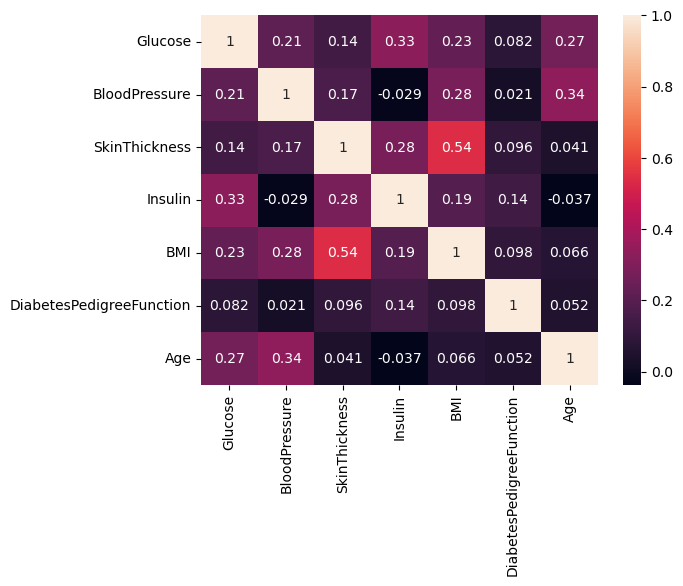

In [61]:
## No redundant fetaures
## We will check correlation
sns.heatmap(data2.corr(),annot=True)

# So no correlation hence no features should be 

# Model Creation

In [62]:
final_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.457143,0.543478,0.031073,0.484277,0.338680,0.591837,6,1
1,0.264516,0.371429,0.413043,0.031073,0.264151,0.168415,0.204082,1,0
2,0.896774,0.342857,0.282609,0.031073,0.160377,0.366440,0.224490,8,1
3,0.290323,0.371429,0.282609,0.150659,0.311321,0.054904,0.000000,1,0
4,0.600000,0.000000,0.543478,0.290019,0.783019,0.181678,0.244898,0,1


In [63]:
## Step 1 Creating independent and dependent variable.
X=final_df.iloc[:,:-1]        #independent 

y=final_df.Outcome
y


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [64]:
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,0.670968,0.457143,0.543478,0.031073,0.484277,0.338680,0.591837,6
1,0.264516,0.371429,0.413043,0.031073,0.264151,0.168415,0.204082,1
2,0.896774,0.342857,0.282609,0.031073,0.160377,0.366440,0.224490,8
3,0.290323,0.371429,0.282609,0.150659,0.311321,0.054904,0.000000,1
4,0.600000,0.000000,0.543478,0.290019,0.783019,0.181678,0.244898,0
...,...,...,...,...,...,...,...,...
763,0.367742,0.514286,0.826087,0.312618,0.462264,0.057372,0.857143,10
764,0.503226,0.428571,0.369565,0.031073,0.584906,0.161629,0.122449,2
765,0.496774,0.457143,0.282609,0.184557,0.251572,0.103023,0.183673,5
766,0.529032,0.285714,0.282609,0.031073,0.374214,0.167181,0.530612,1


In [65]:
## Step 2 Creating training and testing data.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45)
                                             #test_size=0.25

In [66]:
final_df.shape

(768, 9)

In [67]:
y_train.shape

(576,)

In [68]:
y_test.shape

(192,)

In [69]:
## Step 3 Model creation
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression()

clf.fit(X_train,y_train)  ## training of my model

LogisticRegression()

In [70]:
## Step 4 Prediction
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [71]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7447916666666666

In [72]:
y_test #model predicted values

195    1
51     0
66     1
437    0
665    0
      ..
671    0
422    0
742    0
331    0
699    0
Name: Outcome, Length: 192, dtype: int64

In [73]:
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob

array([[0.31980319, 0.68019681],
       [0.90854099, 0.09145901],
       [0.68308619, 0.31691381],
       [0.55710246, 0.44289754],
       [0.81249137, 0.18750863],
       [0.8282845 , 0.1717155 ],
       [0.47558526, 0.52441474],
       [0.94080874, 0.05919126],
       [0.32329522, 0.67670478],
       [0.91876   , 0.08124   ],
       [0.22549564, 0.77450436],
       [0.51846172, 0.48153828],
       [0.93294933, 0.06705067],
       [0.4739027 , 0.5260973 ],
       [0.72363944, 0.27636056],
       [0.91715733, 0.08284267],
       [0.0364848 , 0.9635152 ],
       [0.53364213, 0.46635787],
       [0.3850051 , 0.6149949 ],
       [0.93804843, 0.06195157],
       [0.57340117, 0.42659883],
       [0.75407861, 0.24592139],
       [0.52803628, 0.47196372],
       [0.8307969 , 0.1692031 ],
       [0.79709483, 0.20290517],
       [0.33088289, 0.66911711],
       [0.88277479, 0.11722521],
       [0.36448554, 0.63551446],
       [0.1969454 , 0.8030546 ],
       [0.84186001, 0.15813999],
       [0.

In [74]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# Evaluation of Model

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [76]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[112  18]
 [ 31  31]]


In [77]:
accuracy_score(y_test,y_pred)                  #acc=142/192= 73%

0.7447916666666666

In [78]:
recall=recall_score(y_test,y_pred)
recall

0.5

In [79]:
precision=precision_score(y_test,y_pred)
precision

0.6326530612244898

In [80]:
f1score=f1_score(y_test,y_pred)
f1score

0.5585585585585586

In [81]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       130
           1       0.63      0.50      0.56        62

    accuracy                           0.74       192
   macro avg       0.71      0.68      0.69       192
weighted avg       0.73      0.74      0.74       192



In [82]:
# weight_avg= 130/192*0.78 +62/192 *0.62 =0.73

In [83]:
y_test.value_counts()

Outcome
0    130
1     62
Name: count, dtype: int64

In [84]:
y_test.shape

(192,)

In [85]:
y_pred.shape

(192,)

In [86]:
X_test.shape

(192, 8)

In [88]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=0)
grid.fit(X_train, y_train)
print(grid.best_params_)


{'C': 1, 'solver': 'liblinear'}
